In [2]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic height (in cm) and weight (in kg) data
heights = np.random.normal(loc=170, scale=10, size=100)  # Mean 170 cm, Std Dev 10 cm
weights = np.random.normal(loc=70, scale=15, size=100)   # Mean 70 kg, Std Dev 15 kg

# Introduce some outliers
heights = np.append(heights, [220, 55, 250, 60])  # Adding extreme height values
weights = np.append(weights, [150, 30, 200, 25])  # Adding extreme weight values

# Create DataFrame
df = pd.DataFrame({'Height_cm': heights, 'Weight_kg': weights})

# Display dataset
print(df.head())
print("\nDataset Summary:\n", df.describe())


    Height_cm  Weight_kg
0  174.967142  48.769439
1  168.617357  63.690320
2  176.476885  64.859282
3  185.230299  57.965841
4  167.658466  67.580714

Dataset Summary:
         Height_cm   Weight_kg
count  104.000000  104.000000
mean   168.088014   71.523624
std     20.221557   21.350867
min     55.000000   25.000000
25%    163.874401   57.744576
50%    168.730437   71.261608
75%    175.008525   78.948395
max    250.000000  200.000000


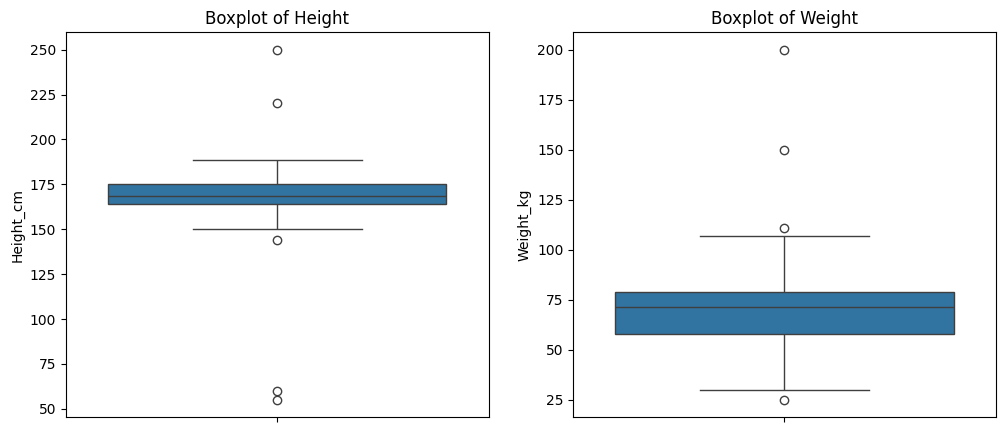

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 1. Visual Detection using Boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Height_cm"])
plt.title("Boxplot of Height")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Weight_kg"])
plt.title("Boxplot of Weight")

plt.show()


In [5]:
# 2. Z-Score Method (Outliers have Z-score > 3 or < -3)
df['Height_Z'] = zscore(df['Height_cm'])
df['Weight_Z'] = zscore(df['Weight_kg'])

height_outliers_z = df[(df['Height_Z'] > 3) | (df['Height_Z'] < -3)]
weight_outliers_z = df[(df['Weight_Z'] > 3) | (df['Weight_Z'] < -3)]

height_outliers_z, weight_outliers_z


(     Height_cm  Weight_kg  Height_Z  Weight_Z
 101       55.0       30.0 -5.619531 -1.954239
 102      250.0      200.0  4.070342  6.046524
 103       60.0       25.0 -5.371072 -2.189556,
      Height_cm  Weight_kg  Height_Z  Weight_Z
 100      220.0      150.0  2.579592  3.693359
 102      250.0      200.0  4.070342  6.046524)

In [6]:
# 3. Interquartile Range (IQR) Method
Q1 = df[['Height_cm', 'Weight_kg']].quantile(0.25)
Q3 = df[['Height_cm', 'Weight_kg']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
height_outliers_iqr = df[(df['Height_cm'] < lower_bound['Height_cm']) | (df['Height_cm'] > upper_bound['Height_cm'])]
weight_outliers_iqr = df[(df['Weight_kg'] < lower_bound['Weight_kg']) | (df['Weight_kg'] > upper_bound['Weight_kg'])]

print("Height Outliers (IQR Method):")
print(height_outliers_iqr)
print("\nWeight Outliers (IQR Method):")
print(weight_outliers_iqr)


Height Outliers (IQR Method):
      Height_cm   Weight_kg  Height_Z  Weight_Z
74   143.802549   74.150362 -1.206785  0.123623
100  220.000000  150.000000  2.579592  3.693359
101   55.000000   30.000000 -5.619531 -1.954239
102  250.000000  200.000000  4.070342  6.046524
103   60.000000   25.000000 -5.371072 -2.189556

Weight Outliers (IQR Method):
      Height_cm   Weight_kg  Height_Z  Weight_Z
79   150.124311  110.802537 -0.892646  1.848596
100  220.000000  150.000000  2.579592  3.693359
102  250.000000  200.000000  4.070342  6.046524
103   60.000000   25.000000 -5.371072 -2.189556



Outliers detected using IQR:
       Height_cm   Weight_kg  Height_Z  Weight_Z
74   143.802549   74.150362 -1.206785  0.123623
79   150.124311  110.802537 -0.892646  1.848596
100  220.000000  150.000000  2.579592  3.693359
101   55.000000   30.000000 -5.619531 -1.954239
102  250.000000  200.000000  4.070342  6.046524
103   60.000000   25.000000 -5.371072 -2.189556

Original Dataset Size: (104, 4)
After Removing Outliers: (98, 4)
After Capping/Flooring: (104, 4)
After Log Transformation: (104, 4)
After Median Imputation: (104, 4)


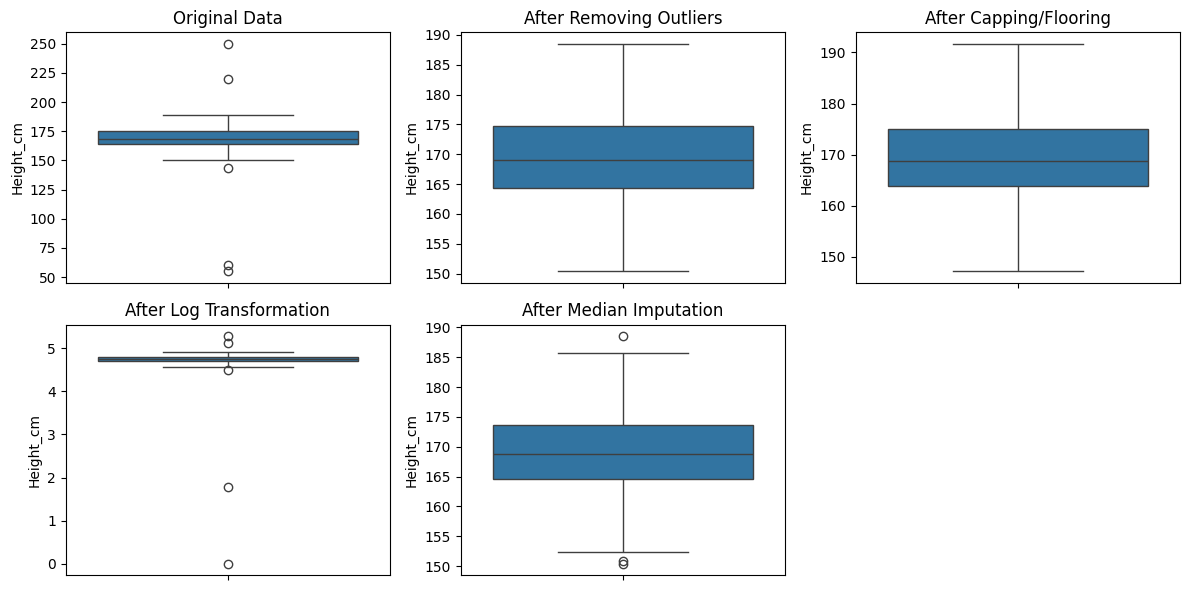

In [8]:

### 3. Handling Outliers ###

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['Height_cm'] < lower_bound['Height_cm']) | (df['Height_cm'] > upper_bound['Height_cm']) |
                  (df['Weight_kg'] < lower_bound['Weight_kg']) | (df['Weight_kg'] > upper_bound['Weight_kg'])]
print("\nOutliers detected using IQR:\n", outliers_iqr)

# a) Removing Outliers
df_no_outliers = df[(df['Height_cm'] >= lower_bound['Height_cm']) & (df['Height_cm'] <= upper_bound['Height_cm']) &
                    (df['Weight_kg'] >= lower_bound['Weight_kg']) & (df['Weight_kg'] <= upper_bound['Weight_kg'])]

# b) Capping/Flooring (Winsorization)
df_capped = df.copy()
df_capped['Height_cm'] = np.where(df['Height_cm'] > upper_bound['Height_cm'], upper_bound['Height_cm'],
                                  np.where(df['Height_cm'] < lower_bound['Height_cm'], lower_bound['Height_cm'], df['Height_cm']))
df_capped['Weight_kg'] = np.where(df['Weight_kg'] > upper_bound['Weight_kg'], upper_bound['Weight_kg'],
                                  np.where(df['Weight_kg'] < lower_bound['Weight_kg'], lower_bound['Weight_kg'], df['Weight_kg']))

# c) Transformations (Log Transform)
df_transformed = df.copy()
df_transformed['Height_cm'] = np.log(df_transformed['Height_cm'] - df_transformed['Height_cm'].min() + 1)
df_transformed['Weight_kg'] = np.log(df_transformed['Weight_kg'] - df_transformed['Weight_kg'].min() + 1)

# d) Mean/Median Imputation
df_imputed = df.copy()
median_height = df['Height_cm'].median()
median_weight = df['Weight_kg'].median()
df_imputed.loc[outliers_iqr.index, 'Height_cm'] = median_height
df_imputed.loc[outliers_iqr.index, 'Weight_kg'] = median_weight

### Displaying Results ###
print("\nOriginal Dataset Size:", df.shape)
print("After Removing Outliers:", df_no_outliers.shape)
print("After Capping/Flooring:", df_capped.shape)
print("After Log Transformation:", df_transformed.shape)
print("After Median Imputation:", df_imputed.shape)

# Visualizing the Effect of Outlier Handling
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.boxplot(y=df["Height_cm"])
plt.title("Original Data")

plt.subplot(2, 3, 2)
sns.boxplot(y=df_no_outliers["Height_cm"])
plt.title("After Removing Outliers")

plt.subplot(2, 3, 3)
sns.boxplot(y=df_capped["Height_cm"])
plt.title("After Capping/Flooring")

plt.subplot(2, 3, 4)
sns.boxplot(y=df_transformed["Height_cm"])
plt.title("After Log Transformation")

plt.subplot(2, 3, 5)
sns.boxplot(y=df_imputed["Height_cm"])
plt.title("After Median Imputation")

plt.tight_layout()
plt.show()